Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/06_Regression'
except ImportError as e:
    pass

## TMP

In [1]:
import random
import ipywidgets as widgets
from IPython.display import display, clear_output, Audio, HTML
import json
import os

with open("data/questions.json", "r") as file:
    questions = json.load(file)

random.shuffle(questions)

# Lifelines
lifelines = {"50:50": 2, "Buddy": 2}

# Game State
current_question = 0
score = 0
lifeline_used = {"50:50": False, "Buddy": False}  # Track if a lifeline has been used this round

output = widgets.Output()
progress_label = widgets.Label()
question_box = widgets.VBox([])
lifeline_box = widgets.VBox([])
next_button = widgets.Button(description="Next Question", layout=widgets.Layout(width="150px"))
next_button.on_click(lambda btn: next_question())  # Bind function

def play_sound(filename):
    if os.path.exists(filename):  # Ensure file exists before playing
        audio = Audio(filename, autoplay=True)
        display(HTML("<style>.jp-OutputArea-output audio { display: none; }</style>"))  # Hide the player
        display(audio)  # Display the audio but assign it to `_` to suppress output

def ask_question():
    """Displays a new question when 'Next Question' is clicked."""
    global current_question, score, lifeline_used
    lifeline_used = {"50:50": False, "Buddy": False}  # Reset lifeline usage per question

    if current_question >= len(questions):
        with output:
            clear_output(wait=True)
            print(f"🎉 Game Over! Your final score: {score}/{len(questions)}")
        return

    with output:
        clear_output(wait=True)
        print("Provide your answer.")

    q = questions[current_question]
    progress_label.value = f"🔢 Question {current_question + 1} / {len(questions)}"

    options = q['options'][:]
    random.shuffle(options)

    buttons = []

    def check_answer(btn):
        """Checks the answer, disables interactions, and shows 'Next Question' button."""
        global current_question, score, lifeline_used

        # Disable answer buttons
        for button in buttons:
            button.disabled = True

        lifeline_used = {"50:50": True, "Buddy": True}

        disable_lifelines()

        # Show result
        with output:
            clear_output(wait=True)
            if btn.description == q['answer']:
                score += 1
                print("✅ Correct!")
                play_sound("data/correct.mp3")  # Play sound for correct answer
            else:
                print(f"❌ Incorrect. The correct answer was: {q['answer']}")
                play_sound("data/incorrect.mp3")  # Play sound for correct answer

        next_button.layout.display = "block"  # Show "Next Question" button

    for option in options:
        button = widgets.Button(description=option, layout=widgets.Layout(width='400px'))
        button.on_click(check_answer)
        buttons.append(button)

    question_box.children = [widgets.HBox(
        [progress_label, widgets.Label(layout=widgets.Layout(width="30px")), next_button]),
                                widgets.Label(q['question'])] + buttons

    next_button.layout.display = "none"  # Hide the button initially

    display_lifeline_buttons()
    display(question_box)
    display(output)


def next_question():
    """Moves to the next question and clears the previous output."""
    global current_question
    current_question += 1
    with output:
        clear_output(wait=True)  # Clear result BEFORE new question appears
        print("Provide your answer.")
    ask_question()  # Load next question


def display_lifeline_buttons():
    """Displays available lifelines as buttons and ensures they are only usable once per question."""
    lifeline_buttons = []
    for lifeline in lifelines:
        if lifelines[lifeline] > 0:
            icon = "🔹" if lifeline == "50:50" else "🧑‍🤝‍🧑"
            button = widgets.Button(description=f"{icon} {lifeline} ({lifelines[lifeline]} left)",
                                    layout=widgets.Layout(width='150px'))
            button.on_click(lambda btn, lf=lifeline: use_lifeline(lf))
            lifeline_buttons.append(button)

    lifeline_box.children = lifeline_buttons
    display(lifeline_box)


def use_lifeline(lifeline):
    """Handles lifeline usage and disables them after one use per question."""
    global current_question, lifeline_used

    if lifelines[lifeline] > 0 and not lifeline_used[lifeline]:
        lifelines[lifeline] -= 1
        lifeline_used[lifeline] = True  # Prevent another lifeline from being used

        with output:
            clear_output(wait=True)

            if lifeline == "50:50":
                q = questions[current_question]
                incorrect_options = [opt for opt in q['options'] if opt != q['answer']]
                removed_options = random.sample(incorrect_options, 2)

                new_buttons = []
                for button in question_box.children[1:]:
                    if button.description in removed_options:
                        button.description = ""
                        button.disabled = True
                    new_buttons.append(button)

                question_box.children = [widgets.HBox(
                    [progress_label, widgets.Label(layout=widgets.Layout(width="30px")), next_button])] + new_buttons

            elif lifeline == "Buddy":
                q = questions[current_question]
            play_sound("data/joker.mp3")  # Play sound for correct answer


        display_lifeline_buttons()
        disable_lifelines()

    display(question_box)
    display(output)


def disable_lifelines():
    global lifeline_used

    """Disables all lifeline buttons."""
    for button in lifeline_box.children:
        if "50:50" in button.description and lifeline_used["50:50"]:
            button.disabled = True
    
        elif "Buddy" in button.description and lifeline_used["Buddy"]:
            button.disabled = True




## Who Wants To Be A Millionaire

<div style="text-align: center;">
    <img src="https://www.snopes.com/uploads/images/radiotv/graphics/elephant1.jpg">
</div>

In [2]:
# Start the quiz
ask_question()

Output()

## Regression

### Key Differences Between Classification and Regression

- **Classification** predicts a **categorical** value:
    - The output is selected from a **finite set of distinct categories** or classes (e.g., "spam" vs. "not spam", "cat" vs. "dog").
    - The goal is to assign an instance to one of the predefined categories.

- **Regression** predicts a **numerical** (continuous) value:
    - The output is a **continuous variable**, which could take on an **infinite range of possible values** (e.g., predicting a person's age, house price, or temperature).
    - Regression models can be used for:
        - **Interpolation**: Making predictions within the range of the observed data.
        - **Extrapolation**: Making predictions beyond the range of the observed data.


### Regression Estimators

Regression estimators in scikit-learn predict continuous target values, working similarly to classification estimators but using methods that minimize the error between predicted and actual values. Below are commonly used regression models:

#### 1. **Linear Regression Models**

**Linear regression** is a method that models the relationship between a dependent variable $y$ and one or more independent variables $X$ by fitting a linear equation to the observed data:

$$
y = \underbrace{\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p}_{\hat{y}} + \epsilon
$$

Where:
- $\beta_0$ is the intercept,
- $\beta_1, \dots, \beta_p$ are the coefficients for each feature,
- $\epsilon$ is the error term (residual).
  
- [**LinearRegression**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html): Fits a simple linear model with coefficients to minimize the **Mean Squared Error (MSE)** between predicted and actual values.
  
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- [**Ridge Regression**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge): A linear regression model with **L2 regularization**, which penalizes large coefficients to prevent overfitting. The regularization term is added to the loss function:

$$
\text{Loss} = \text{MSE} + \alpha \sum_{j=1}^{n} \beta_j^2
$$

Where $\alpha$ is the regularization strength, controlling the penalty for large coefficients.

- [**Lasso Regression**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso): A linear regression model with **L1 regularization**, which encourages sparsity by driving some coefficients to zero. The regularization term is:

$$
\text{Loss} = \text{MSE} + \alpha \sum_{j=1}^{n} |\beta_j|
$$

Lasso is useful for feature selection, as it can eliminate less important features by setting their coefficients to zero.


***Example: Derivation of the Maximum Likelihood Estimator with MSE***

Consider a linear regression model in matrix form:

$$
\mathbf{y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon}
$$

where:
- $\mathbf{y} \in \mathbb{R}^n$ is the vector of observed values,
- $\mathbf{X} \in \mathbb{R}^{n \times (p+1)}$ is the matrix of input features **with a column of ones** added to account for the intercept,
- $\boldsymbol{\beta} \in \mathbb{R}^{p+1}$ is the vector of parameters, where the first element represents the intercept,
- $\boldsymbol{\epsilon} \sim \mathcal{N}(0, \sigma^2 \mathbf{I})$ is the error term with variance $\sigma^2$.

Each observation $y_i$ follows a **normal distribution with mean $\mathbf{x}_i^\top \boldsymbol{\beta}$ and variance $\sigma^2$**. Therefore, the probability density function for each observation is:

$$
p(y_i | \mathbf{x}_i, \boldsymbol{\beta}, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(y_i - \mathbf{x}_i^\top \boldsymbol{\beta})^2}{2\sigma^2}\right)
$$

Assuming independence across all $n$ observations, the **joint likelihood function** for all observations is the product of individual likelihoods:

$$
p(\mathbf{y} | \mathbf{X}, \boldsymbol{\beta}, \sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(y_i - \mathbf{x}_i^\top \boldsymbol{\beta})^2}{2\sigma^2}\right)
$$

This can be simplified as:

$$
p(\mathbf{y} | \mathbf{X}, \boldsymbol{\beta}, \sigma^2) = \frac{1}{(2\pi \sigma^2)^{n/2}} \exp\left(-\frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i - \mathbf{x}_i^\top \boldsymbol{\beta})^2 \right)
$$

In matrix notation, we can write this as:

$$
p(\mathbf{y} | \mathbf{X}, \boldsymbol{\beta}, \sigma^2) = \frac{1}{(2\pi \sigma^2)^{n/2}} \exp\left(-\frac{1}{2\sigma^2} \| \mathbf{y} - \mathbf{X} \boldsymbol{\beta} \|^2 \right)
$$

The **log-likelihood** is typically used for easier manipulation. Taking the logarithm of the likelihood function:

$$
\log \mathcal{L}(\boldsymbol{\beta}, \sigma^2) = \log p(\mathbf{y} | \mathbf{X}, \boldsymbol{\beta}, \sigma^2)
$$

This results in:

$$
\log \mathcal{L}(\boldsymbol{\beta}, \sigma^2) = -\frac{n}{2} \log(2\pi \sigma^2) - \frac{1}{2\sigma^2} \| \mathbf{y} - \mathbf{X} \boldsymbol{\beta} \|^2
$$

To **maximize the likelihood**, we minimize the negative log-likelihood. Ignoring constants independent of $\boldsymbol{\beta}$, we can minimize the following:

$$
\mathcal{L}(\boldsymbol{\beta}) \propto \frac{1}{2} \| \mathbf{y} - \mathbf{X} \boldsymbol{\beta} \|^2
$$

This is equivalent to minimizing the Mean Squared Error (MSE) objective:

$$
\text{MSE}(\boldsymbol{\beta}) = \frac{1}{n} \| \mathbf{y} - \mathbf{X} \boldsymbol{\beta} \|^2
$$

The solution for $\boldsymbol{\beta}$ that minimizes the MSE, including the intercept term, can be derived by solving the normal equations:

$$
\boldsymbol{\hat{\beta}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

Thus, $\boldsymbol{\hat{\beta}}$ is the **Maximum Likelihood Estimator (MLE)** for the parameters $\boldsymbol{\beta}$, including the intercept, under the assumption of normally distributed errors.

#### 2. **K-Nearest Neighbor Regression (KNN Regression)**

K-Nearest Neighbor regression is a non-parametric method that predicts the target value of a new data point by averaging the target values of its **k** nearest neighbors:

$$
\hat{y} = \frac{1}{k} \sum_{i=1}^{k} y_i
$$

Where $y_i$ are the target values of the nearest neighbors.

- [**KNeighborsRegressor**](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html): Predicts the output by finding the k-nearest points in the training data, based on distance (usually Euclidean), and averaging their target values.

#### 3. **Decision Tree Regression**

Decision Tree regression splits the data into branches based on feature values to minimize the variance in the target values within each split. The tree is built by recursively partitioning the data:

[**DecisionTreeRegressor**](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html): This model works by partitioning the input space into regions and fitting a constant to each region. The tree is built by selecting splits that minimize metrics such as the **Mean Squared Error (MSE)** in each region.

  🔹 **Difference to Gini**:  
  - In **classification**, decision trees often use the **Gini impurity** or **entropy** to measure how "pure" a node is. Gini impurity measures how often a randomly chosen element would be incorrectly classified if it were labeled randomly based on the class distribution.
  - In **regression**, instead of class labels, we predict continuous values. The tree chooses splits that minimize **MSE**, which measures how far the predicted values deviate from the actual values. Unlike Gini, which focuses on class separation, MSE in regression ensures that splits lead to regions with the least variance in predicted values.


<div style="text-align: center;">
    <img src="https://www.saedsayad.com/images/Decision_tree_r1.png">
</div>

#### 4. **Neural Network Regression**

Neural networks model complex relationships in the data by passing inputs through multiple layers of interconnected neurons. The network adjusts the weights of connections through backpropagation to minimize the error between predicted and actual values.

- [**MLPRegressor**](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html): This is a feedforward neural network that minimizes the error in predictions by adjusting weights using an optimization algorithm like stochastic gradient descent. It can capture complex, non-linear relationships in the data.

#### Summary
Each regression estimator has its strengths:
- **Linear models** work well when the relationship between features and the target is linear.
- **KNN** is a simple, non-parametric method effective in smaller datasets with non-linear relationships.
- **Decision Trees** are powerful but prone to overfitting without pruning.
- **Neural Networks** are highly flexible and capable of modeling complex, non-linear relationships but can require a large amount of data and computational power.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

household_energy = pd.read_csv('data/household_energy.csv')
household_energy.head()

,House_Size_m2,Appliances,Temperature_C,Date,Energy_Consumption_kWh
0,109,6,-4.933628,1/1/2020,139.060696
1,157,6,-2.339252,1/2/2020,140.634181
2,106,1,-5.431556,1/3/2020,132.958035
3,80,1,-7.018320,1/4/2020,133.571861
4,133,3,-2.987828,1/5/2020,135.371985


Let's have a look at some plots to determine how the features (we ignore the dates for now) are related to each other:

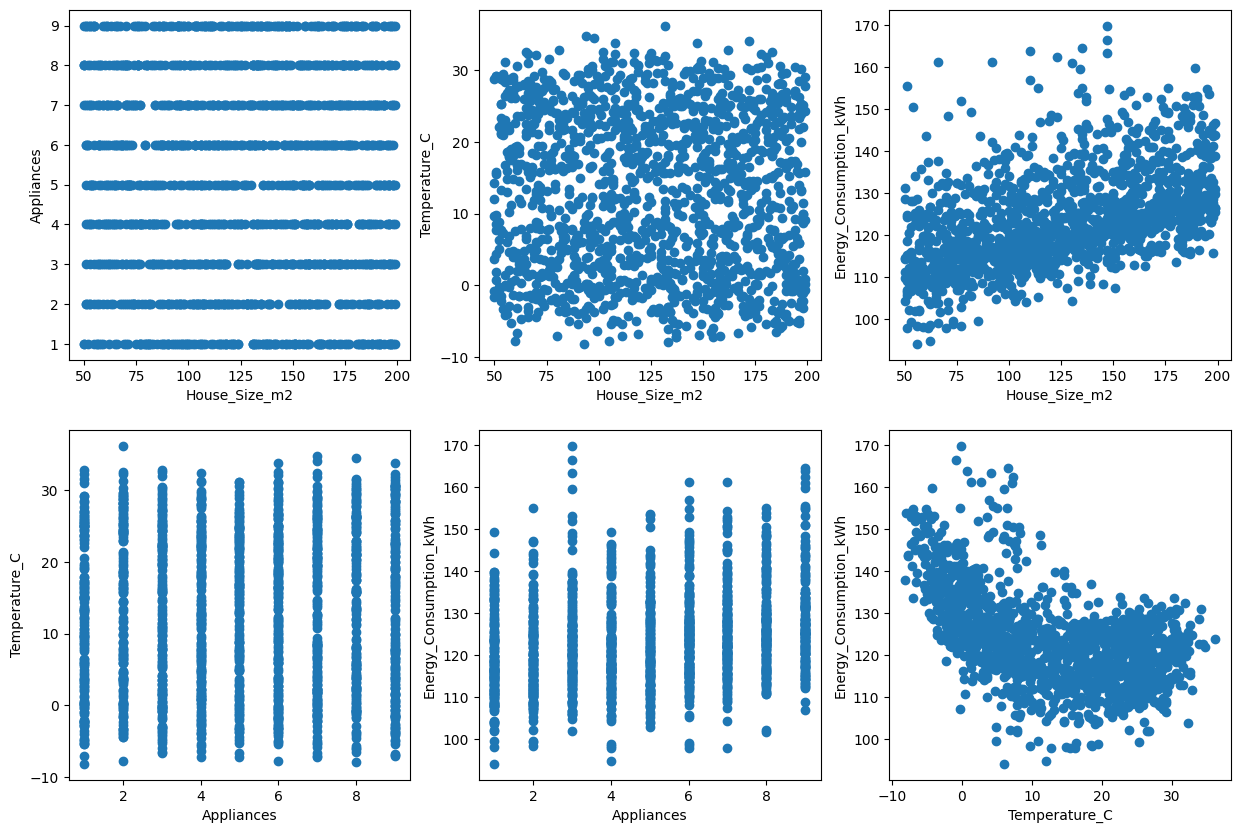

In [4]:
import itertools
import matplotlib.pyplot as plt

# create a list of all columns that we are considering
# features = [ 'age', 'temp', 'weight', 'length' ]
features = [ 'House_Size_m2', 'Appliances', 'Temperature_C', 'Energy_Consumption_kWh']

# create all combinations of considered columns
combinations = itertools.combinations(features, 2)

# create a figure and specify its size
fig = plt.figure(figsize=(15,10))

# go through all combinations and create one plot for each
figure_index = 1
for combination in combinations:
    # add a sub plot to the figure
    axs = fig.add_subplot(2,3,figure_index)
    
    # plot the feature combination
    # axs.scatter(fish[combination[0]], fish[combination[1]])
    axs.scatter(household_energy[combination[0]], household_energy[combination[1]])

    
    # set the axis labels of the current sub plot
    axs.set_xlabel(combination[0])
    axs.set_ylabel(combination[1])
        
    # increase the figure index (otherwise all plots are drawn in the first subplot)
    figure_index+=1

    
# show the plot
plt.show()

It seems like there is a ***linear relation between house size and energy consumption***. We can fit a linear regression model and add it to the plot. First, we prepare the house size as a feature and the energy consumption as target variable.

In [5]:
from sklearn.model_selection import train_test_split

# separate features and target variable
consumption = household_energy['Energy_Consumption_kWh']

# special case: we only have one feature, so we must reshape the data here
size = household_energy['House_Size_m2'].values.reshape(-1, 1)

# create a train/test split
size_train, size_test, size_target_train, size_target_test = train_test_split(
    size, consumption, test_size=0.4, random_state=42)

Now let's fit the linear regression model:

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np

# create and fit a linear regression
consumption_estimator_size = LinearRegression()

consumption_estimator_size.fit(size_train, size_target_train)

LinearRegression()

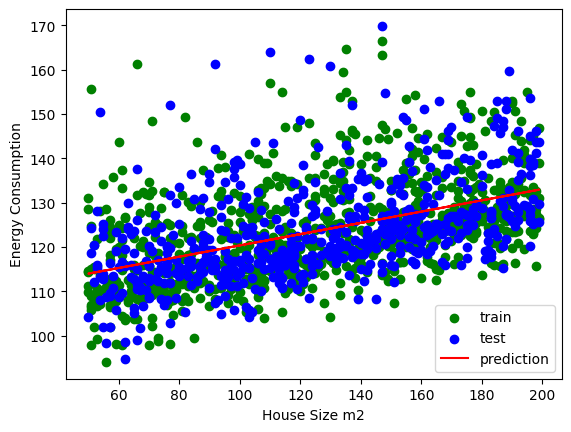

cosumption = 0.12719207935530855*size + 107.63711984823918


In [7]:
# Sort the temperature values and corresponding predictions for plotting
sorted_indices = np.argsort(household_energy['House_Size_m2'].values)
sorted_size = household_energy['House_Size_m2'].values[sorted_indices]
sorted_features = size[sorted_indices]
sorted_predictions = consumption_estimator_size.predict(sorted_features.reshape(-1, 1))

# plot the training and test data points with different colors
plt.scatter(size_train, size_target_train, c='green', label='train')
plt.scatter(size_test, size_target_test, c='blue', label='test')

# plot the predicted values
plt.plot(household_energy['House_Size_m2'], consumption_estimator_size.predict(size), c='red', label='prediction')

plt.xlabel('House Size m2')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

# print the model that was fitted (the regression formula)
print("cosumption = {}*size + {}".format(consumption_estimator_size.coef_[0], consumption_estimator_size.intercept_))

Now lets see if that also works for the **temperature** as feature.

In [8]:
# special case: we only have one feature, so we must reshape the data here
temperature = household_energy['Temperature_C'].values.reshape(-1, 1)

# create a train/test split
temperature_train, temperature_test, temperature_target_train, temperature_target_test = train_test_split(
    temperature, consumption, test_size=0.4, random_state=42)

# create and fit a linear regression
consumption_estimator_temperature = LinearRegression()

consumption_estimator_temperature.fit(temperature_train, temperature_target_train)

LinearRegression()

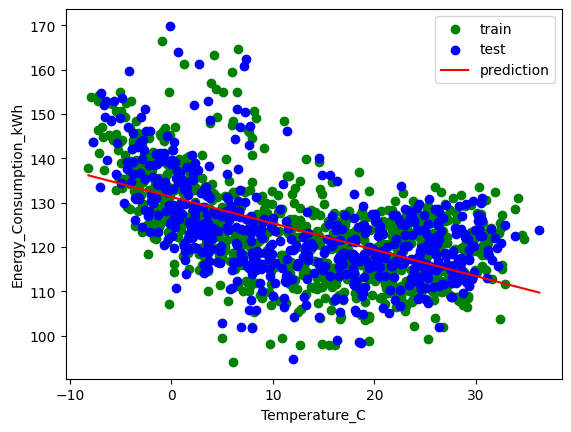

cosumption = -0.595312767838701*temperature + 131.30133680220496


In [9]:
# Sort the temperature values and corresponding predictions for plotting
sorted_indices = np.argsort(household_energy['Temperature_C'].values)
sorted_temp = household_energy['Temperature_C'].values[sorted_indices]
sorted_features = temperature[sorted_indices]
sorted_predictions = consumption_estimator_temperature.predict(sorted_features.reshape(-1, 1))

# plot the training and test data points with different colors
plt.scatter(temperature_train, temperature_target_train, c='green', label='train')
plt.scatter(temperature_test, temperature_target_test, c='blue', label='test')

# plot the predicted values (now sorted by temperature)
plt.plot(sorted_temp, sorted_predictions, c='red', label='prediction')

plt.xlabel('Temperature_C')
plt.ylabel('Energy_Consumption_kWh')
plt.legend()
plt.show()

# print the model that was fitted (the regression formula)
print("cosumption = {}*temperature + {}".format(consumption_estimator_temperature.coef_[0], consumption_estimator_temperature.intercept_))

### Polynomial Features


The fitted regression does not really match the data that we see. It seems that we need a polynomial regression here. We can fit such a regression by using a [```PolynomialFeatures``` transformer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) that generates all possible feature combinations for the polynomial that we want to fit. On these transformed features, we can then use the linear regression again to fit our model:

In [10]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Transform the feature into a quadratic feature (2nd degree polynomial)
poly = PolynomialFeatures(degree=2)
temperature_poly = poly.fit_transform(temperature)

# create a train/test split
temperature_poly_train, temperature_poly_test, temperature_poly_target_train, temperature_poly_target_test = train_test_split(
    temperature_poly, consumption, test_size=0.4, random_state=42)

# create and fit a linear regression on the polynomial features
consumption_estimator_temperature_poly = LinearRegression()
consumption_estimator_temperature_poly.fit(temperature_poly_train, temperature_poly_target_train)

LinearRegression()

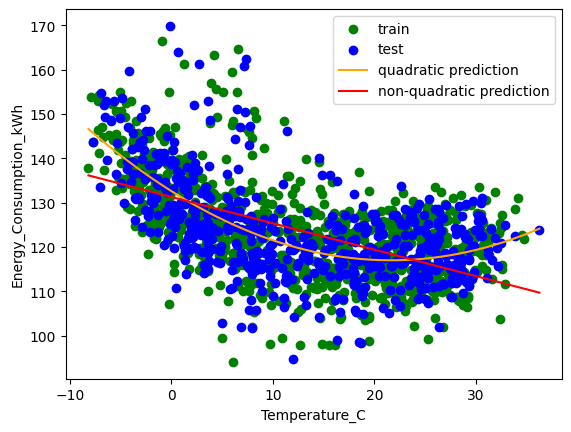

consumption = 0.0333*temperature^2 + -1.4425*temperature + 132.6192


In [11]:
# Sort the temperature values and corresponding predictions for plotting
sorted_indices = np.argsort(household_energy['Temperature_C'].values)
sorted_temp = household_energy['Temperature_C'].values[sorted_indices]
sorted_features_poly = temperature_poly[sorted_indices]
sorted_predictions_poly = consumption_estimator_temperature_poly.predict(sorted_features_poly)
sorted_predictions = consumption_estimator_temperature.predict(sorted_features_poly[:, 1].reshape(-1, 1))

# plot the training and test data points with different colors
plt.scatter(temperature_poly_train[:, 1], temperature_poly_target_train, c='green', label='train')
plt.scatter(temperature_poly_test[:, 1], temperature_poly_target_test, c='blue', label='test')

# plot the predicted values (now sorted by temperature)
plt.plot(sorted_temp, sorted_predictions_poly, c='orange', label='quadratic prediction')
# plot the predicted values (now sorted by temperature)
plt.plot(sorted_temp, sorted_predictions, c='red', label='non-quadratic prediction')

plt.xlabel('Temperature_C')
plt.ylabel('Energy_Consumption_kWh')
plt.legend()
plt.show()

# print the quadratic regression formula
coef = consumption_estimator_temperature_poly.coef_
intercept = consumption_estimator_temperature_poly.intercept_
print(f"consumption = {coef[2]:.4f}*temperature^2 + {coef[1]:.4f}*temperature + {intercept:.4f}")

<div style="text-align: center;">
    <img src="https://pbs.twimg.com/media/CUogtjOUsAAovyR.jpg">
</div>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import ipywidgets as widgets
from IPython.display import display

# Generate fixed noisy quadratic dataset
np.random.seed(42)
X_data = np.linspace(-10, 10, 15)  # X values
X_scatter = np.linspace(-10, 10, 500)  # X values
y_data = X_data**2 + np.random.normal(scale=10, size=X_data.shape)  # Quadratic with noise

# Reshape X_data for sklearn
X_data = X_data.reshape(-1, 1)

# Interactive function
def plot_polynomial_regression(model_degree=2, show_green_line=False):
    """Fits a polynomial regression model to the fixed dataset and updates the plot."""
    
    # Create a new figure each time to prevent overlapping plots
    fig, ax = plt.subplots(figsize=(8, 5))

    # Fit polynomial regression model
    model = make_pipeline(PolynomialFeatures(model_degree), LinearRegression())
    model.fit(X_data, y_data)

    # Predict on sorted values
    sorted_indices = np.argsort(X_data[:, 0])
    sorted_X = X_data[sorted_indices]
    sorted_predictions = model.predict(sorted_X)

    sorted_predictions_scatter = model.predict(X_scatter.reshape(-1, 1))

    # Scatter plot of noisy data
    ax.scatter(X_data, y_data, c='blue', label='Noisy Data')

    # Plot fitted polynomial regression curve
    ax.plot(sorted_X, sorted_predictions, c='red', label=f'Polynomial Regression (Degree {model_degree})')

    # Plot the true quadratic function (thicker line for better visibility)
    if show_green_line:
        ax.plot(X_scatter, sorted_predictions_scatter, c='green', linestyle='dashed', label='True Function (y = x²)', linewidth=2)

    # Print regression equation
    model_coefs = model.named_steps['linearregression'].coef_
    intercept = model.named_steps['linearregression'].intercept_
    print(f"Regression Model: y = {' + '.join([f'{coef:.2f}*x^{i}' for i, coef in enumerate(model_coefs)])} + {intercept:.2f}")

    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.legend()
    ax.set_title(f"Polynomial Regression with Degree {model_degree}")
    
    # Display the updated plot
    plt.show()

# Create an input widget to manually type in the polynomial degree (between 1 and 50)
degree_input = widgets.IntText(
    value=2,
    min=1,
    max=100,
    description="Model Degree:",
    disabled=False
)

# Function to ensure the degree stays within valid bounds
def on_degree_change(change):
    if change['new'] < 1:
        degree_input.value = 1
    elif change['new'] > 100:
        degree_input.value = 100

# Attach the observer to the degree_input widget
degree_input.observe(on_degree_change, names='value')

# Create button to toggle the green line
button = widgets.ToggleButton(
    value=False,
    description="Show True Poly",
    disabled=False,
    button_style='info',
    tooltip="Click to toggle the green line"
)

# Ensure updates when input or button changes
interactive_plot = widgets.interactive(plot_polynomial_regression, model_degree=degree_input, show_green_line=button)

# Display input field, button, and plot
display(interactive_plot)


interactive(children=(IntText(value=2, description='Model Degree:'), ToggleButton(value=False, button_style='i…

## Evaluation

With a continuous target variable, it does not make sense to count how often we predicted the exact correct value. Instead, we evaluate how close our prediction is to the correct value using common regression metrics. In this exercise, we will talk about the following measures:

### 1. **Mean Squared Error (MSE)**

Mean Squared Error (MSE) measures the average squared difference between the predicted values $\hat{y}$ and the actual target values $y$. It penalizes larger errors more than smaller ones, making it sensitive to outliers:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2
$$

Where:
- $n$ is the number of data points,
- $y_i$ is the actual value for the $i$-th data point,
- $\hat{y}_i$ is the predicted value for the $i$-th data point.

### 2. **Root Mean Squared Error (RMSE)**

Root Mean Squared Error (RMSE) is the square root of MSE. It gives the error in the same units as the target variable and is easier to interpret. Like MSE, RMSE is also sensitive to larger errors.

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2} = = \sqrt{\text{MSE}}
$$

### 3. **Coefficient of Determination (R²)**

The **coefficient of determination** ($R^2$) measures the proportion of variance in the target variable that is explained by the regression model. It provides insight into the goodness of fit:

- $R^2 = 1$ indicates a perfect fit, meaning the model explains all the variance.
- $R^2 = 0$ means the model performs no better than simply predicting the mean of the target variable.
- Negative values of $R^2$ suggest that the model is worse than a naive mean prediction.

The formula for $R^2$ is:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2}{\sum_{i=1}^{n} \left( y_i - \bar{y} \right)^2}
$$

A higher $R^2$ value indicates a better fit, but it does not imply causation or suitability for all types of models.

### **Summary**
- **MSE (Mean Squared Error)** and **RMSE (Root Mean Squared Error)** penalize larger errors due to squaring the residuals. They are useful for understanding the absolute prediction accuracy in the same units as the target variable.  
  - **MSE** is more sensitive to large errors (outliers) since errors are squared, making it a better choice when large deviations should be heavily penalized.  
  - **RMSE** provides a more interpretable metric in the same unit as the target variable, making it easier to understand the typical prediction error.

- **$R^2$ (Coefficient of Determination)** measures how well the model explains the variance in the target variable. Unlike MSE/RMSE, it is a **relative measure of fit** rather than an absolute error metric.  
  - A higher **$R^2$** means the model explains more of the variability in the data, while a low or negative **$R^2$** suggests poor explanatory power.  
  - However, **$R^2$ does not indicate whether predictions are accurate in absolute terms**, making it less useful when exact error magnitudes are important.

🔹 **Key Difference**:  
- **MSE/RMSE** are absolute error metrics useful when you care about the actual magnitude of errors.  
- **$R^2$** is a relative goodness-of-fit measure, helping to understand how well the model captures variance but without direct insight into actual prediction errors.


In [13]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# predict the values for the test data
predictions = consumption_estimator_temperature.predict(temperature_test)

# evaluate using different measures
mse = mean_squared_error(temperature_target_test, predictions)
r2 = r2_score(temperature_target_test, predictions)

print("MSE (without poly):", mse)
print("RMSE (without poly):", sqrt(mse))
print("R^2 (without poly):", r2, "\n")

# predict the values for the test data
predictions_poly = consumption_estimator_temperature_poly.predict(temperature_poly_test)

# evaluate using different measures
mse = mean_squared_error(temperature_poly_target_test, predictions_poly)
r2 = r2_score(temperature_poly_target_test, predictions_poly)

print("MSE (with poly):", mse)
print("RMSE (with poly):", sqrt(mse))
print("R^2 (with poly):", r2)

MSE (without poly): 87.47604332529478
RMSE (without poly): 9.352862841146276
R^2 (without poly): 0.28298125287475373 

MSE (with poly): 71.11461498354282
RMSE (with poly): 8.432948178634968
R^2 (with poly): 0.4170916950578445


## Feature Selection

Feature selection is the process of identifying and selecting the most relevant features (input variables) for building a predictive model. This helps improve model performance by reducing overfitting, improving accuracy, and reducing computation time. The following methods are common approaches to feature selection:

- [```f_regression``` function](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html)
    - Performs an [F-Test](https://en.wikipedia.org/wiki/F-test) to determine the relationship between each feature and the target variable in a regression context.
    - The F-Test compares the variance explained by the feature to the unexplained variance (error):
    
    $$F = \frac{\text{explained variance by feature}}{\text{unexplained variance (error)}}$$
    
    - Features with higher F-values are considered more important for predicting the target.


- [```SelectKBest``` class](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)
    - Selects the top ```k``` features based on a scoring function, such as ```f_regression``` or others like mutual information.
    - This method allows you to specify the number of features to retain, helping focus the model on the most important variables.


- [```SelectFwe``` class](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFwe.html)
    - This method selects all features with a p-value below a specified ```threshold``` $\tau$, based on the results of the statistical test from a scoring function (e.g., ```f_regression```).
    - The p-value helps assess whether the feature's effect on the target is statistically significant. The smaller the p-value, the more significant the feature.
    - The goal is to retain features where:

    $$p\text{-value} < \tau$$
    
    - This method ensures that only features with significant relationships to the target are kept.


- **Recursive Feature Elimination (RFE)**: [```RFECV``` class](https://scikit-learn.org/stable/modules/feature_selection.RFECV.html)
    - RFE is an iterative method that fits a model (any estimator that provides feature importance, such as a decision tree or linear regression) and removes the least important features at each step.
    - This method uses cross-validation to determine the optimal number of features by evaluating performance at each iteration and selecting the number of features that results in the best cross-validation score.
    - The steps in RFECV are:
      1. Fit the model.
      2. Rank features by importance.
      3. Remove the least important features.
      4. Repeat until the optimal number of features is selected based on cross-validation.

For more details, have a look at the [feature selection documentation of scikit-learn](https://scikit-learn.org/stable/modules/feature_selection.html).

In [14]:
# separate features and target variable
household_energy_target = household_energy['Energy_Consumption_kWh']
household_energy_lean = household_energy.drop(columns=['Date', 'Energy_Consumption_kWh'])

# create a train/test split
data_train, data_test, target_train, target_test = train_test_split(
    household_energy_lean, household_energy_target,test_size=0.2, random_state=42)

Let's try an F Regression:

In [15]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import f_regression

# Step 1: Create a transformer
transformer = PolynomialFeatures(degree=2, include_bias=False)

# Step 2: Scale the data
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
data_train_scaled = scaler.fit_transform(data_train)

# Step 3: Apply the polynomial transformation on the scaled data
data_train_poly = transformer.fit_transform(data_train_scaled)

# Step 4: Run the F-Test
f, pval = f_regression(data_train_poly, target_train)

# Step 5: Prepare a dataframe to inspect the results
stat = pd.DataFrame({ 
    'feature': transformer.get_feature_names_out(household_energy_lean.columns), 
    'F value': f, 
    'p value': pval 
})

# Step 6: Format the p-values and F-values for readability
stat['p value'] = round(stat['p value'], 2)
stat['F value'] = round(stat['F value'], 2)

# Step 7: Show the results
display(stat)


,feature,F value,p value
0,House_Size_m2,389.08,0.00
1,Appliances,82.32,0.00
2,Temperature_C,536.89,0.00
3,House_Size_m2^2,0.70,0.40
4,House_Size_m2 Appliances,0.00,1.00
5,House_Size_m2 Temperature_C,0.05,0.83
6,Appliances^2,0.03,0.86
7,Appliances Temperature_C,0.02,0.90
8,Temperature_C^2,177.05,0.00


Of course we can also make feature selection a part of the sklearn pipeline and have it automatically train a model with the best found features:

MSE: 47.1023258720534
RMSE: 6.8631134240994
R^2: 0.6479668922459578
5.543285851137228*House_Size_m2 + 2.570633709315919*Appliances + -5.953194512323685*Temperature_C + 4.223951606135836*Temperature_C^2 + 119.20361997537351


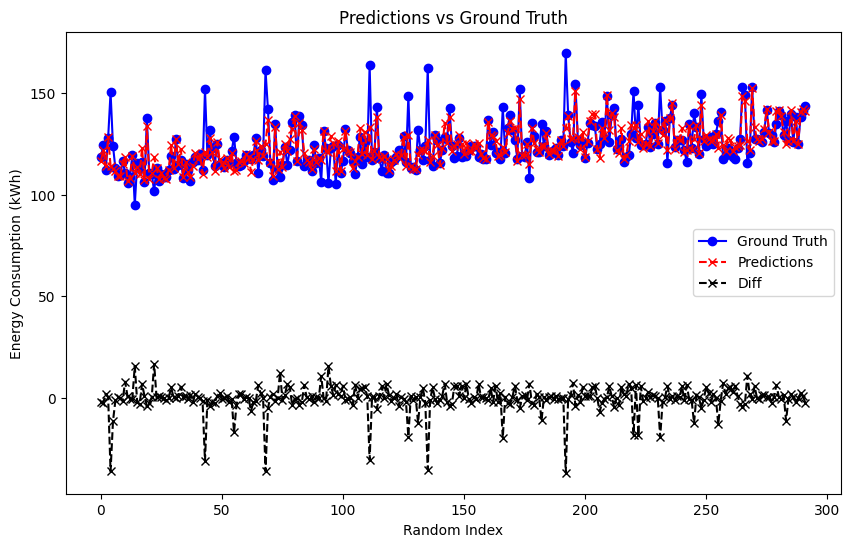

In [16]:
from sklearn.feature_selection import SelectFwe
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize the estimator and feature selection method
estimator = LinearRegression()
best = SelectFwe(f_regression, alpha=0.05)
transformer = PolynomialFeatures(degree=2, include_bias=False)
scaler = StandardScaler()  # Assuming scaler was defined earlier

# Create the pipeline
pipeline = Pipeline([ ('scaler', scaler), 
                      ('transformer', transformer), 
                      ('feature_selection', best), 
                      ('estimator', estimator)])

# Fit the regression model on the training data
pipeline.fit(data_train, target_train)

# Predict the values for the test data
predictions = pipeline.predict(data_test)

# Evaluate using different measures
mse = mean_squared_error(target_test, predictions)
r2 = r2_score(target_test, predictions)

print("MSE:", mse)
print("RMSE:", np.sqrt(mse))
print("R^2:", r2)

# Get the selected features
selected_features = pipeline.named_steps['feature_selection'].get_support()
feature_index = 0

# Print the model that was fitted (the regression formula)
for i, f in enumerate(pipeline.named_steps['transformer'].get_feature_names_out(household_energy_lean.columns)):
    if selected_features[i]:
        if i > 0:
            print(" + ", end='')
        print("{}*{}".format(pipeline.named_steps['estimator'].coef_[feature_index], f), end='')
        feature_index += 1
print(" + {}".format(pipeline.named_steps['estimator'].intercept_))

# Sort by a specific feature (e.g., the first feature, assuming it's meaningful for ordering)
sorted_indices = np.argsort(data_test.iloc[:, 0])  # Sort by the first feature (column 0)

# Sort predictions and corresponding target values based on the sorted indices
sorted_predictions = predictions[sorted_indices]
sorted_target_test = target_test.iloc[sorted_indices]

# Plot predictions vs ground truth
plt.figure(figsize=(10, 6))
plt.plot(sorted_target_test.values, label='Ground Truth', marker='o', linestyle='-', color='blue')
plt.plot(sorted_predictions, label='Predictions', marker='x', linestyle='--', color='red')
plt.plot(sorted_predictions - sorted_target_test.values, label='Diff', marker='x', linestyle='--', color='black')


# Set plot labels and title
plt.title('Predictions vs Ground Truth')
plt.xlabel('Random Index')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.show()



## Pen & Paper Exercises

### P&P (1) Simple Linear Regression

In simple linear regression, we aim to minimize the **sum of squared errors (SSE)** between the actual values $y$ and the predicted values $\hat{y}$, where:

$$
\hat{y} = \beta_0 + \beta_1 x
$$

##### The formulas for the parameters in the regression model are:

1. **Slope** ($\beta_1$):

$$
\beta_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}
$$

2. **Intercept** ($\beta_0$):

$$
\beta_0 = \bar{y} - \beta_1 \bar{x}
$$

Where:
- $\bar{x}$ is the mean of $x$ values.
- $\bar{y}$ is the mean of $y$ values.

Given the following dataset:

| $x$ | $y$  |
|-----|------|
| 1   | 2    |
| 2   | 4    |
| 3   | 5    |
| 4   | 4    |
| 5   | 5    |

Fit a simple linear regression model $y = \beta_0 + \beta_1 x$ using the **least squares method**.
1. Calculate the coefficients $\beta_0$ and $\beta_1$.
2. Provide the equation of the best-fit line.

#### P&P (2) Solution:

##### Steps to Solve:

1. **Calculate the means of $x$ and $y$:**

$$
\bar{x} = \frac{1 + 2 + 3 + 4 + 5}{5} = 3
$$

$$
\bar{y} = \frac{2 + 4 + 5 + 4 + 5}{5} = 4
$$

2. **Calculate the slope $\beta_1$:**

$$
\beta_1 = \frac{(1 - 3)(2 - 4) + (2 - 3)(4 - 4) + (3 - 3)(5 - 4) + (4 - 3)(4 - 4) + (5 - 3)(5 - 4)}{(1 - 3)^2 + (2 - 3)^2 + (3 - 3)^2 + (4 - 3)^2 + (5 - 3)^2}
$$

$$
\beta_1 = \frac{4 + 0 + 0 + 0 + 2}{4 + 1 + 0 + 1 + 4} = \frac{6}{10} = 0.6
$$

3. **Calculate the intercept $\beta_0$:**

$$
\beta_0 = \bar{y} - \beta_1 \bar{x} = 4 - (0.6 \cdot 3) = 4 - 1.8 = 2.2
$$

4. **Equation of the best-fit line:**

$$
y = 2.2 + 0.6x
$$

---

##### Explanation of Formula Derivation:

The formula for $\beta_1$ (slope) comes from the idea of minimizing the sum of squared errors (SSE) in the model. We take the partial derivative of SSE with respect to $\beta_0$ and $\beta_1$, set them equal to 0, and solve for the optimal values of the parameters.

The intercept $\beta_0$ is calculated after finding $\beta_1$, ensuring that the model passes through the mean of the data $(\bar{x}, \bar{y})$.

### P&P (2) Understanding the Bias-Variance Trade-off

Consider two models for predicting the target variable $y$:

**Model 1**: A linear regression model that predicts $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2$.

**Model 2**: A more complex model with higher-degree polynomial terms and interactions: $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1^2 + \beta_4 x_1 x_2 + \beta_5 x_2^2$.

1. Which model is likely to have higher **bias**?
2. Which model is likely to have higher **variance**?
3. Explain how each model fits into the **bias-variance trade-off**.

#### P&P (2) Solution

1. **Model 1 (Linear Model)** is likely to have **higher bias** because it assumes a linear relationship between $x_1$, $x_2$, and $y$, which may not capture complex patterns in the data.
   
2. **Model 2 (Complex Model)** is likely to have **higher variance** because it is more flexible and can fit more complex relationships, potentially overfitting the training data. This flexibility means the model is more sensitive to fluctuations in the data.

3. **Bias-Variance Trade-off**:

   - **Model 1** has high bias but low variance. It may underfit the data by oversimplifying the relationship between the features and the target, resulting in predictions that are consistently off from the true values (high bias).
   
   - **Model 2** has low bias but high variance. It is more likely to fit the training data very well but perform poorly on unseen data due to overfitting, making its predictions vary significantly with different training sets (high variance).

The **bias-variance trade-off** describes the balance between underfitting (high bias, low variance) and overfitting (low bias, high variance). The goal is to find a model that minimizes both, typically through cross-validation and model selection.

<div style="text-align: center;">
    <img src="https://www.kdnuggets.com/wp-content/uploads/arya_biasvariance_tradeoff_4.png">
</div>

## P&P (3) Regression Exam

You, Tim, and Lara analyze an agriculture dataset for your team project.

The dataset includes:  
- **X₁**: Avg. monthly temperature (°C)  
- **X₂**: Monthly rainfall (mm)  
- **X₃**: Sunny days per month  
- **y**: Crop yield (tons)  

The goal is to build a regression model to predict **y** using **X₁, X₂, and X₃**.

### P&P (3.1) Regressor Evaluation Metrics

Tim and Lara each trained regression models. You chose the **R²** score as the primary metric.  
Tim's model achieved an **R² score of 0.55**, while Lara's model achieved an **R² score of 0.86**.

#### P&P (3.1 a) 

Why is **R²** commonly used, and what are its key characteristics? Based on this, which model would you choose: Tim's or Lara's? 

##### Solution

The **R²** score measures the proportion of variance in the target variable explained by the model.  
- A higher **R²** indicates better performance as the model captures more variability.  
- **Choice:** Lara's model (**R² = 0.86**) is preferred since it explains more variance than Tim's model (**R² = 0.55**).

#### P&P (3.1 b) 

Below are two plots comparing the models' predictions to real values. Assign the **R²** scores to the plots by completing the titles (e.g., Tim's Regressor).

![Comparison Plots](imgs/comparison_plots.png)

##### Solution

Left: Tim's Regressor (**R² = 0.55**), Right: Lara's Regressor (**R² = 0.86**).

#### P&P (3.1 c) 

In addition to **R²**, suggest another evaluation metric that could provide further insights into the model's performance. Briefly explain its relevance.  

##### Solution

**Mean Absolute Error (MAE):**  
- Measures the average absolute difference between predictions and actual values.  
- MAE is robust to outliers and provides an interpretable error in the original units (tons).

### P&P (3.2) Regressor Evaluation Metrics

Tim trained his model using an ANN, while Lara used a Regression Tree model. To complement these approaches, you decide to test a **Linear Regression model**:

$$ y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \epsilon$$

#### P&P (3.2 a) 

Explain the components of this formula and briefly describe how the model can be trained. 

##### Solution

Components:**
- **$β₀$**: Intercept, the baseline prediction when **$X₁, X₂, X₃ = 0$**.
- **$β₁, β₂, β₃$**: Coefficients representing the effect of **$X₁, X₂, X₃$** on **$y$**.
- **$\epsilon$**: Error term capturing unexplained variability.

**Training Methods:**
- **Least Squares:** Minimizes the sum of squared errors between predictions and actual values.
- **Maximum Likelihood Estimation (MLE):** Finds coefficients by maximizing the likelihood of observing the given data under a Gaussian assumption for errors.

#### P&P (3.2 b) 

Ridge and Lasso are two regularization techniques often used with regression models. Briefly describe the intuition behind these techniques and how they differ from each other.  

##### Solution

Regularization Techniques:**
- **Ridge Regression:** Adds $L_2$-penalty $ \lambda \sum_{j=1}^n \beta_j^2 $ to shrink coefficients, reducing overfitting.
- **Lasso Regression:** Adds $L_1$-penalty $ \lambda \sum_{j=1}^n |\beta_j| $ to shrink and potentially set coefficients to zero, enabling feature selection.

#### P&P (3.2 c) 


Describe why the initial linear regression model might have been insufficient in capturing the relationship between crop yield and monthly rainfall. Propose how you would modify the linear regression model.  

![Rainfall Plot](imgs/rainfall.png)


##### Solution

The linear regression model might fail since the relationship between $X_2$ (rainfall) and $y$ (crop yield) is quadratic, i.e.,  non-linear.  
**Solution:** 

Modify the model to include polynomial features, such as $X_2^2$, to better capture the relationship:
$$
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_2^2 + \epsilon.
$$